In [5]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel('Homework_2022.xlsx')
df.head()

,idind,psu,status,age,male,industry,lnwage,public,internet,children,...,id66,id67,id68,id69,id70,id71,id72,id73,id74,id75
0,37,Волосовский,ПГТ,60,1,"НАУКА, КУЛЬТ",9.104980,0,1,2,...,0,0,0,0,0,0,0,0,1,0
1,122,Волосовский,Село,41,0,ОБРАЗОВАНИЕ,10.778960,1,1,1,...,1,0,0,0,1,0,0,0,1,0
2,125,Волосовский,Село,54,0,СЕЛЬСКОЕ ХОЗ,10.491270,0,1,3,...,0,0,0,0,0,0,0,0,0,1
3,126,Волосовский,Село,48,1,СЕЛЬСКОЕ ХОЗ,9.903487,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,132,Волосовский,Село,55,0,ЗДРАВООХРАНЕ,10.308950,1,1,1,...,1,0,0,0,0,0,0,0,1,0


In [7]:
df = df[df['id45'] == 1]
df.head()

,idind,psu,status,age,male,industry,lnwage,public,internet,children,...,id66,id67,id68,id69,id70,id71,id72,id73,id74,id75
151,3194,Курьинский р,Село,57,1,ЖИЛИЩНО-КОММ,9.392662,0,1,1,...,0,0,0,0,0,0,0,0,0,0
152,3232,Курьинский р,Село,49,0,"НАУКА, КУЛЬТ",10.373490,1,1,2,...,0,0,0,0,0,0,0,0,1,0
153,3233,Курьинский р,Село,53,1,ЭНЕРГЕТИЧЕСК,8.517193,1,0,2,...,0,0,0,0,0,0,0,1,0,0
154,3316,Курьинский р,Село,50,0,ЗДРАВООХРАНЕ,9.179881,1,1,2,...,1,0,0,0,0,0,0,0,1,0
155,3323,Курьинский р,Село,49,0,"ТОРГОВЛЯ, БЫ",8.612503,0,1,3,...,0,1,0,0,0,0,0,0,0,1


In [8]:
df['my_var'] = df['id45']
df['my_var'].head()

151    1
152    1
153    1
154    1
155    1
Name: my_var, dtype: int64

In [9]:
  df.drop([col for col in df.columns if "id" in col], axis=1, inplace=True)  
    #удалить все столбцы, содержащие «id» в заголовке

In [10]:
df.head()

,psu,status,age,male,industry,lnwage,public,internet,children,urban,educ,my_var
151,Курьинский р,Село,57,1,ЖИЛИЩНО-КОММ,9.392662,0,1,1,0,1,1
152,Курьинский р,Село,49,0,"НАУКА, КУЛЬТ",10.373490,1,1,2,0,1,1
153,Курьинский р,Село,53,1,ЭНЕРГЕТИЧЕСК,8.517193,1,0,2,0,1,1
154,Курьинский р,Село,50,0,ЗДРАВООХРАНЕ,9.179881,1,1,2,0,2,1
155,Курьинский р,Село,49,0,"ТОРГОВЛЯ, БЫ",8.612503,0,1,3,0,1,1


# Список переменных

## регион - Алтайский край

· public – 1 если государственное предприятие (в государственной собственности), 0 если частное;

· lnwage – логарифм заработной платы, полученной за последние 30 дней по основному месту работы;

· educ – уровень образования, категориальная переменная (0 для индивидов без среднего образования)

1. среднее образование

2. ПТУ, техническое училище

3. институт, университет, академия

· urban – 1 респондент проживает в городе, 0 в сельской местности;

· male – пол, 1 для мужчин, 0 для женщин;

· age – возраст в годах;

· children – количество детей;

· industry – отрасль занятости;

1. ЛЕГКАЯ, ПИЩЕВАЯ ПРОМЫШЛЕННОСТЬ

2. ГРАЖДАНСКОЕ МАШИНОСТРОЕНИЕ

3. ВОЕННО-ПРОМЫШЛЕННЫЙ КОМПЛЕКС

4. НЕФТЕГАЗОВАЯ ПРОМЫШЛЕННОСТЬ

5. ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ

6. СТРОИТЕЛЬСТВО

7. ТРАНСПОРТ, СВЯЗЬ

8. СЕЛЬСКОЕ ХОЗЯЙСТВО

9. ОРГАНЫ УПРАВЛЕНИЯ

10. ОБРАЗОВАНИЕ

11. НАУКА, КУЛЬТУРА

12. ЗДРАВООХРАНЕНИЕ

13. АРМИЯ, МВД, ОРГАНЫ БЕЗОПАСНОСТИ

14. ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ

15. ФИНАНСЫ

16. ЭНЕРГЕТИЧЕСКАЯ ПРОМЫШЛЕННОСТЬ

17. ЖИЛИЩНО-КОММУНАЛЬНОЕ ХОЗЯЙСТВО

18. ОПЕРАЦИИ С НЕДВИЖИМОСТЬЮ

19. СОЦИАЛЬНОЕ ОБСЛУЖИВАНИЕ

20. ЮРИСПРУДЕНЦИЯ

21. ЦЕРКОВЬ

22. ХИМИЧЕСКАЯ ПРОМЫШЛЕННОСТЬ

23. ДЕРЕВООБРАБАТЫВАЮЩАЯ ПРОМЫШЛЕННОСТЬ, ЛЕ

24. СПОРТ, ТУРИЗМ, РАЗВЛЕЧЕНИЯ

25. УСЛУГИ НАСЕЛЕНИЮ

26. IT, ИНФОРМАЦИОННЫЕ ТЕХНОЛОГИИ

27. ЭКОЛОГИЯ, ЗАЩИТА ОКРУЖАЮЩЕЙ СРЕДЫ

28. ОРГАНИЗАЦИЯ ОБЩЕСТВЕННОГО ПИТАНИЯ

29. СМИ, ИЗДАТЕЛЬСТВО, ПЕЧАТЬ, ТЕЛЕКОММУНИК

30. РЕКЛАМА, МАРКЕТИНГ

31. ОБЩЕСТВЕННЫЕ ОРГАНИЗАЦИИ, СОВЕТ ВЕТЕРАН

· internet – приходилось ли респонденту в течение последних 12 месяцев пользоваться Интернетом, 1 если да, 0 в противном случае;

· psu – номер региона.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 151 to 3724
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   psu       157 non-null    object 
 1   status    157 non-null    object 
 2   age       157 non-null    int64  
 3   male      157 non-null    int64  
 4   industry  157 non-null    object 
 5   lnwage    157 non-null    float64
 6   public    157 non-null    int64  
 7   internet  157 non-null    int64  
 8   children  157 non-null    int64  
 9   urban     157 non-null    int64  
 10  educ      157 non-null    int64  
 11  my_var    157 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 15.9+ KB


In [12]:
df.describe(include='object') #для категориальных переменных

,psu,status,industry
count,157,157,157
unique,2,2,17
top,Бийск и Бийс,Город,"ТОРГОВЛЯ, БЫ"
freq,92,87,26


(array([62., 63., 21.,  5.,  2.,  2.,  1.,  0.,  0.,  1.]),
 array([   999.99972102,  11799.96529177,  22599.93086252,  33399.89643327,
         44199.86200402,  54999.82757477,  65799.79314552,  76599.75871627,
         87399.72428702,  98199.68985777, 108999.65542851]),
 <BarContainer object of 10 artists>)

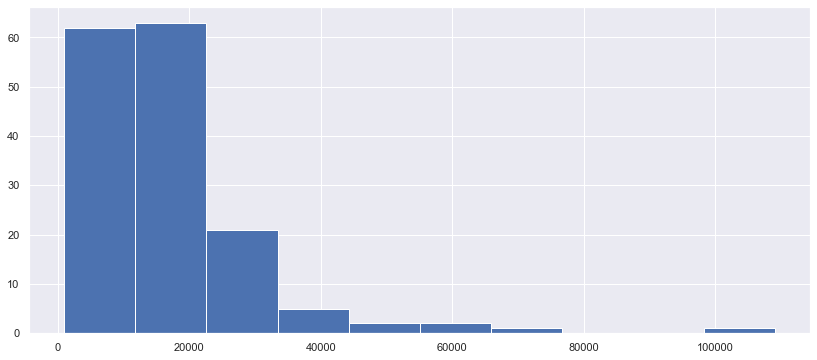

In [94]:
res = [e**x for x in df.lnwage]
plt.hist(res)

In [95]:
df['status'].value_counts()

Город    87
Село     70
Name: status, dtype: int64

In [15]:
df['internet'].value_counts()

1    123
0     34
Name: internet, dtype: int64

In [16]:
df['psu'].value_counts()

Бийск и Бийс    92
Курьинский р    65
Name: psu, dtype: int64

In [17]:
df[['public', 'male']].value_counts()

public  male
1       0       47
0       1       41
        0       39
1       1       30
dtype: int64

In [18]:
df['male'].value_counts()

0    86
1    71
Name: male, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8c4a7a4280>,
 [Text(0.5372433205005935, 0.9598800000924578, 'среднее образование'),
  Text(-1.0964783007081724, 0.08795075938341135, 'ПТУ, техническое училище'),
  Text(0.18619394099326775, -1.0841272140931597, 'институт, университет, академия'),
  Text(1.0629916461512632, -0.2829288960368449, 'без среднего образования')],
 [Text(0.2930418111821419, 0.5235709091413405, '33.8%'),
  Text(-0.5980790731135486, 0.047973141481860736, '29.9%'),
  Text(0.1015603314508733, -0.591342116778087, '28.0%'),
  Text(0.5798136251734163, -0.15432485238373359, '8.3%')])

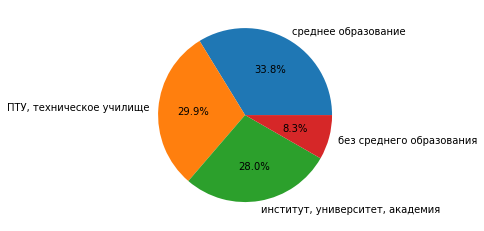

In [19]:
z = df['educ'].value_counts()
labels = ['среднее образование', 'ПТУ, техническое училище', 'институт, университет, академия', 'без среднего образования']
plt.pie(x = z, labels=labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f8c79806370>,
 [Text(0.2509002489293628, 1.0710037652068194, '2'),
  Text(-0.8410747762238163, -0.7089380937712809, '1'),
  Text(0.6659937045785784, -0.8754726640288099, '0'),
  Text(1.0441027819257909, -0.34619269312743245, '3'),
  Text(1.099119224615097, -0.044010567838968985, '4')],
 [Text(0.13685468123419786, 0.5841838719309923, '42.7%'),
  Text(-0.4587680597584452, -0.3866935056934259, '36.9%'),
  Text(0.36326929340649733, -0.47753054401571443, '11.5%'),
  Text(0.5695106083231586, -0.1888323780695086, '7.6%'),
  Text(0.59951957706278, -0.024005764275801263, '1.3%')])

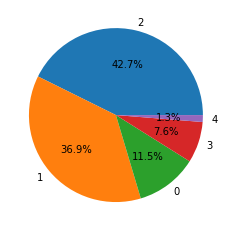

In [20]:
n = df['children'].value_counts()
labels = ['2', '1','0', '3', '4' ]
plt.pie(x = n, labels=labels, autopct='%1.1f%%')

ТОРГОВЛЯ, БЫ    0.165605
ОБРАЗОВАНИЕ     0.121019
ЗДРАВООХРАНЕ    0.101911
ЛЕГКАЯ, ПИЩЕ    0.082803
СЕЛЬСКОЕ ХОЗ    0.063694
ТРАНСПОРТ, С    0.063694
СТРОИТЕЛЬСТВ    0.057325
ЖИЛИЩНО-КОММ    0.050955
АРМИЯ, МВД,     0.050955
НАУКА, КУЛЬТ    0.044586
ГРАЖДАНСКОЕ     0.044586
ВОЕННО-ПРОМЫ    0.038217
ОРГАНЫ УПРАВ    0.031847
ДРУГАЯ ОТРАС    0.025478
НЕФТЕГАЗОВАЯ    0.025478
ЭНЕРГЕТИЧЕСК    0.019108
ФИНАНСЫ         0.012739
Name: industry, dtype: float64


Text(0, 0.5, '')

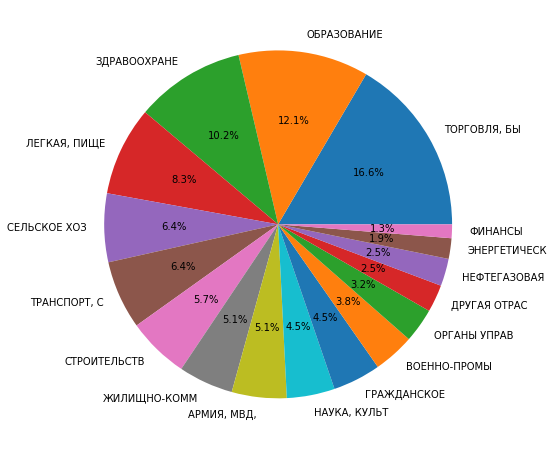

In [21]:
 g = df['industry'].value_counts(normalize=True) #параметр считает процентное распределение
print(g)
labels = ['ТОРГОВЛЯ, БЫ', 'ОБРАЗОВАНИЕ', 'ЗДРАВООХРАНЕ', 'ЛЕГКАЯ, ПИЩЕ', 'СЕЛЬСКОЕ ХОЗ', 'ТРАНСПОРТ, С', 'СТРОИТЕЛЬСТВ', 'ЖИЛИЩНО-КОММ', 'АРМИЯ, МВД,', 'НАУКА, КУЛЬТ', 'ГРАЖДАНСКОЕ', 'ВОЕННО-ПРОМЫ', 'ОРГАНЫ УПРАВ', 'ДРУГАЯ ОТРАС ', 'НЕФТЕГАЗОВАЯ', 'ЭНЕРГЕТИЧЕСК', 'ФИНАНСЫ' ]
g.plot(kind='pie', labels=labels, autopct='%1.1f%%',  figsize=(8, 8))
plt.ylabel("")

In [22]:
g.count()

17

/Users/psychicks/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


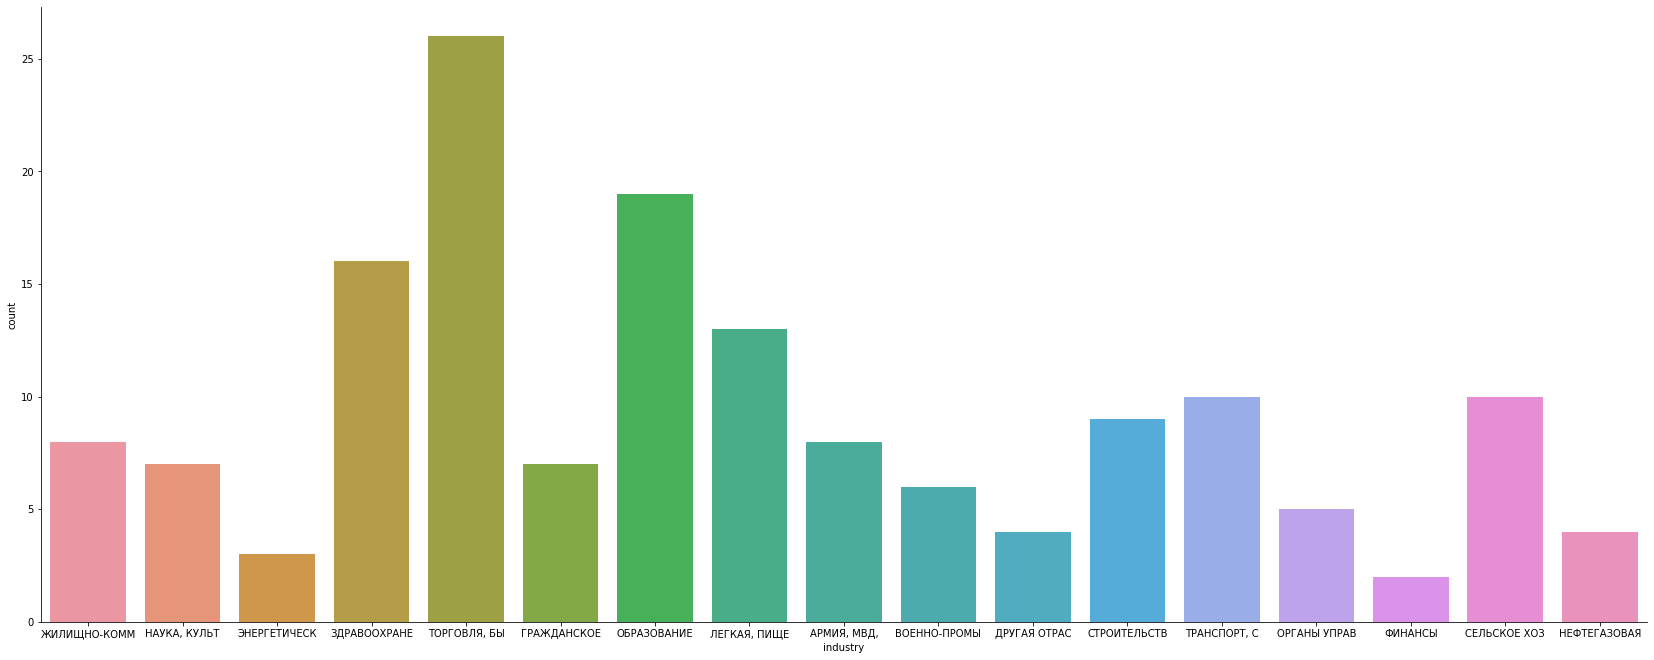

In [23]:
#нужно построить процентное распределение
g = sns.catplot('industry', data=df, kind='count')
g.fig.set_size_inches(30,10) 

<AxesSubplot:>

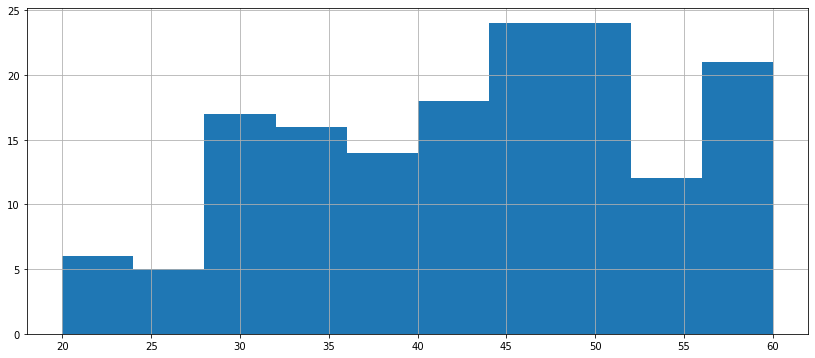

In [24]:
df['age'].hist(bins=10, figsize=(14,6))

## Задание 1. 

#### Опишите вашу выборку 

Кластерная выборка, состаящая из жителей Алтайского края, примерно в равной степени представлена:

- горожанами и селянами
- женщинами и мужчинами
- работниками частных и государственных учреждений
- респондентами с уровнем образования
   1. среднее образование
   2. ПТУ, техническое училище
   3. институт, университет, академия

Возраст опрошенных: 20-60, незначительно преобладают респонденты средневозрастного диапазона

Большинство из опрошенных:

- пользовались интернетом в течении года
- имеют 1-2 детей

Регион представлен 17 видами промышленных отраслей, примерно половина жителей занята в сферах:

- торговли и быта
- здравоохранения
- образования
- легкой и пищевой

Средний уровень зарплат в регионе - 13.000 руб. Длинный правый хвост, есть выбросы

#### Что является в Вашем случае генеральной совокупностью?

жители Алтайского края, находящиеся в трудоспособном возрасте

####  Как можно проверить репрезентативность Вашей выборки? (описать словами, не проверять). 

- можно посчитать [предельную ошибку выборки, стандартное отклонение и доверительный интервал](https://scanmarket.ru/blog/vyborka-razmer-ne-glavnoe-ili-glavnoe)
- необходимо убедиться, что

   Генеральная совокупность значительно больше выборки
   
   Произведения n*p и n*(1-p), где n=размер выборки а p=доля признака, – не меньше 5.



## Задание 2. 
Рассчитайте описательные статистики (минимум, максимум, среднее значение, стандартное отклонение, размах) для всех переменных в Вашей выборке кроме отрасли и номера региона.


In [26]:
df.describe()

,age,male,lnwage,public,internet,children,urban,educ,my_var
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.0
mean,42.630573,0.452229,9.491133,0.490446,0.783439,1.503185,0.554140,1.777070,1.0
std,10.371489,0.499305,0.686858,0.501508,0.413219,0.844471,0.498651,0.951374,0.0
min,20.000000,0.000000,6.907755,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,35.000000,0.000000,9.179881,0.000000,1.000000,1.000000,0.000000,1.000000,1.0
50%,44.000000,0.000000,9.532424,0.000000,1.000000,2.000000,1.000000,2.000000,1.0
75%,50.000000,1.000000,9.903487,1.000000,1.000000,2.000000,1.000000,3.000000,1.0
max,60.000000,1.000000,11.599100,1.000000,1.000000,4.000000,1.000000,3.000000,1.0


In [107]:
# считаем размах

df1 = df.select_dtypes(exclude=['object'])

print(df1.apply(lambda x: max(x) - min(x)))

age         40.000000
male         1.000000
lnwage       4.691345
public       1.000000
internet     1.000000
children     4.000000
urban        1.000000
educ         3.000000
my_var       0.000000
dtype: float64


## Задание 3. 
Оцените квартили (25%, 50%, 75%) распределения для непрерывных переменных в выборке. Определите межквартильный размах. 


In [28]:
print("квартиль 25%:", df['lnwage'].quantile(0.25))
print("квартиль 50%:", df['lnwage'].quantile(0.5))
print("квартиль 75%:",df['lnwage'].quantile(0.75))
print("межквартильный размах:", iqr(df['lnwage']))

квартиль 25%: 9.179881
квартиль 50%: 9.532424
квартиль 75%: 9.903487
межквартильный размах: 0.7236060000000002


## Задание 4. 
Сравните среднее значение, медиану и моду для непрерывных переменных в выборке. Что можно сказать об их соотношении?


среднее значение: 9.49113304458598
медиана: 9.532424
мода: 0    9.21034
dtype: float64


Text(9.0261332, 44.320499999999996, 'Mode: 9.21')

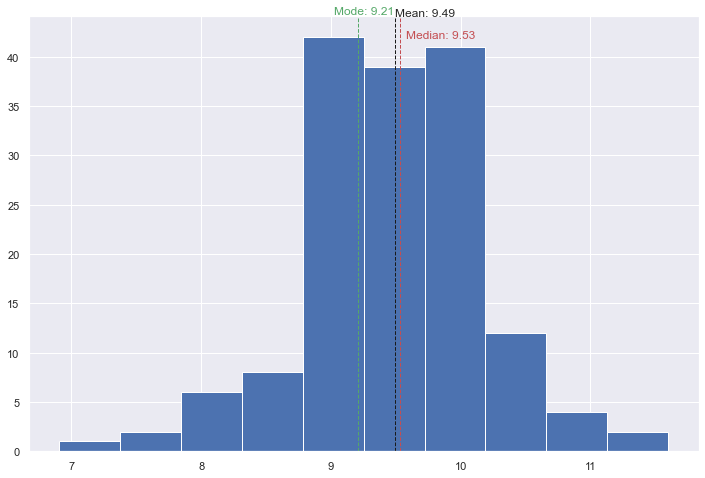

In [108]:
print("среднее значение:", df['lnwage'].mean())
print("медиана:", df['lnwage'].median())
print("мода:",df['lnwage'].mode())

df['lnwage'].hist(figsize=(12,8))
plt.axvline(df['lnwage'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim() # координаты для текста
plt.text(df['lnwage'].mean()*1.0, max_ylim*1.0, 'Mean: {:.2f}'.format(df['lnwage'].mean())) # добавить текст

plt.axvline(df['lnwage'].median(), color='r', linestyle='dashed', linewidth=1)
plt.text(df['lnwage'].median()*1.005, max_ylim*0.95, 'Median: {:.2f}'.format(df['lnwage'].median()), color='r',)

plt.axvline(9.21034, color='g', linestyle='dashed', linewidth=1)
plt.text(9.21034*0.98, max_ylim*1.005, 'Mode: {:.2f}'.format(9.21034), color='g')

## интерпретация

на графике видно, что значения медианы и среднего lnwage расположены достаточно близко друг к другу, дальше всего располагается значение моды. 
слева направо: мода - среднее - медиана. такое соотношение не характерно для какого-либо распределения и говорит о возможной ошибке в данных*

## Задание 5. 
Постройте box-plot для всех непрерывных переменных. Есть ли выбросы? 

/Users/psychicks/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lnwage'>

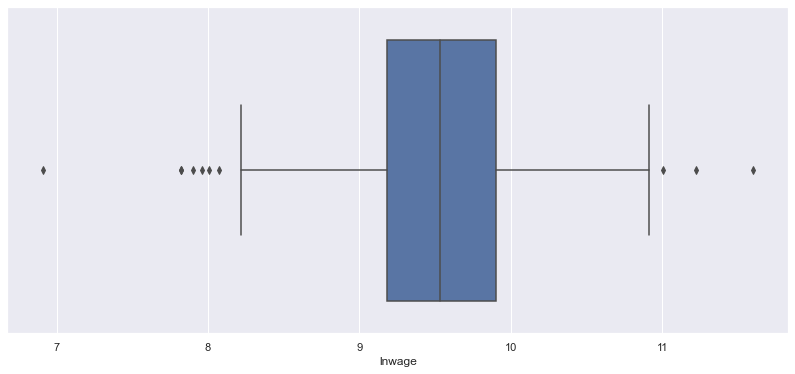

In [30]:
sns.set(rc = {'figure.figsize':(14,6)}) # увеличить графичек
sns.boxplot(df['lnwage'], orient="h")

Выбросов немного, но они тем заметнее, что более 50% распределения располагается в интервале (9,10)

## Задание 6. 
Постройте гистограммы распределения для непрерывных переменных в выборке. Что можно сказать о скошенности (асимметрии) и островершинности их распределений? Рассчитайте соответствующие показатели (Skewness и Kurtosis) и сделайте выводы. 

<AxesSubplot:ylabel='Density'>

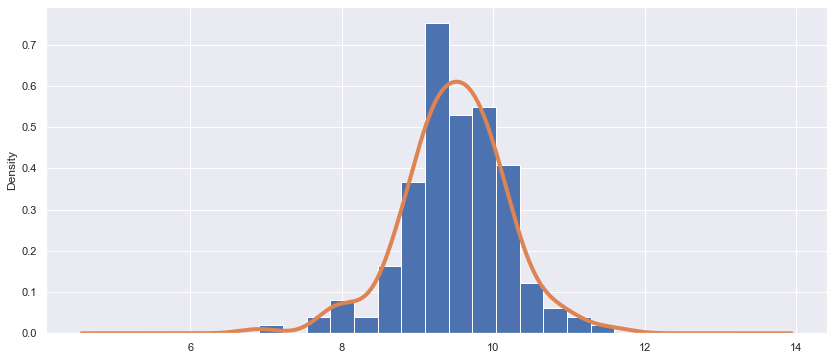

In [31]:
df['lnwage'].hist(bins=15, density=True, figsize=(14,6))
df['lnwage'].plot(kind='kde', linewidth=4)

In [32]:
from scipy.stats import skew, kurtosis

s = skew(df['lnwage'], bias=False)
k = kurtosis(df['lnwage'], bias=False)

print('Skewness:', s)
print('Kurtosis:', k)

Skewness: -0.27878548412992243
Kurtosis: 1.4117035769440296


## интерпретация

- отрицательное значение показателя Skewness (коэффициент асимметрии) говорит о скошенности распределения переменных lnwage влево

- показатель Kurtosis (коэффициент островершинности) < 3 говорит о распределении с отрицательным эксцессом, имеющим плоскую вершину и тонкие хвосты

## Задание 7. 
Как распределены респонденты в Вашей выборке по уровню образования? Постройте гистограмму. 

In [33]:
a = df['educ'] 

def my_function(a):
    
    if a == 1:
        return str('среднее образование')
    if a == 2:
        return str('ПТУ, техническое училище') 
    if a == 3:
        return str('институт, университет, академия') 
    else:
        return str('без среднего образования') 
    
a = a.apply(my_function)

<AxesSubplot:>

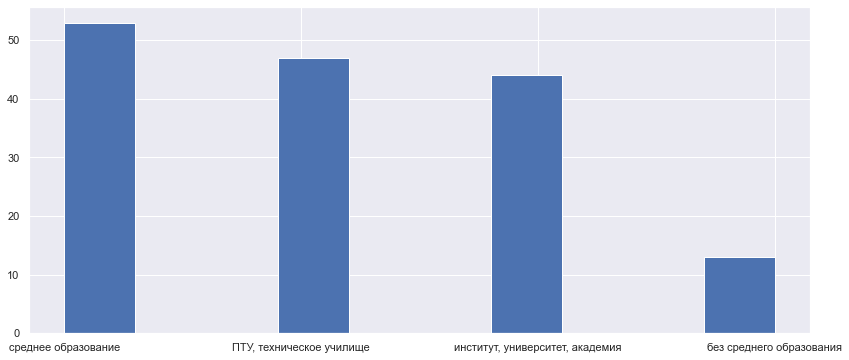

In [34]:
a.hist()

## Задание 8. 
Постройте 95% и 99% доверительные интервалы для математического ожидания и стандартного отклонения генеральной совокупности для логарифма заработной платы.

In [35]:
from scipy import stats

print('95% ДИ:', stats.norm.interval(0.95, df.lnwage.mean(), df.lnwage.std(ddof=1)/np.sqrt(df.lnwage.size)))
print('99% ДИ:', stats.norm.interval(0.99, df.lnwage.mean(), df.lnwage.std(ddof=1)/np.sqrt(df.lnwage.size)))

95% ДИ: (9.383693170775569, 9.598572918396393)
99% ДИ: (9.34993311565188, 9.632332973520082)


## Задание 9. 
Постройте 90% и 95% доверительный интервал для доли женщин в генеральной совокупности. 

In [36]:
women = 1 - df.male.sum() / len(df.male)

# 90% ДИ
stats.norm().ppf(1 - 0.1/2)
a = women - stats.norm().ppf(1 - 0.1/2) * np.sqrt( (women - (1-women)) / len(df.male) )
b = women + stats.norm().ppf(1 - 0.1/2) * np.sqrt( (women - (1-women)) / len(df.male) )

print('90% ДИ: ', (a, b))

# 95% ДИ
stats.norm().ppf(1 - 0.05/2)
c = women - stats.norm().ppf(1 - 0.05/2) * np.sqrt( (women - (1-women)) / len(df.male) )
d = women + stats.norm().ppf(1 - 0.05/2) * np.sqrt( (women - (1-women)) / len(df.male) )
print('95% ДИ: ', (c, d))

90% ДИ:  (0.5071943267252744, 0.5883470745486109)
95% ДИ:  (0.4994209689726754, 0.5961204323012099)


## Задание 10. 
Проверьте гипотезу, что матожидание логарифма заработной платы равно 10.17 против двусторонней и правосторонней альтернативной гипотезы. 

In [37]:
#  H0: μ = 10.17 
# двусторонняя H0: μ != 10.17 

def mean_norm_test(x, mu0, alpha=0.05):
    mn = x.mean() - mu0
    st = x.std(ddof=1)/np.sqrt(x.size)
    
    t = mn/st # нашли наблюдаемое значение t-статистики
    
    # критическое значение t-статистики 
    q = stats.norm().ppf(1 - alpha/2)
    
    if (t < q) & (t > -q): # np.abs(t) < q
        return "Гипотеза не отвергается"
    else:
        return "Гипотеза отвергается" 

In [38]:
mean_norm_test(df.lnwage, mu0=10.17, alpha=0.1)

'Гипотеза отвергается'

In [39]:
# правосторонняя H1: μ > 10.17 

def mean_norm_test1(x, mu0, alpha=0.05):
    mn = x.mean() - mu0
    st = x.std(ddof=1)/np.sqrt(x.size)
    
    t = mn/st # нашли наблюдаемое значение t-статистики
    
    # критическое значение t-статистики 
    q = stats.norm().ppf(1 - alpha)
    
    if t < q: # np.abs(t) < q
        return "Гипотеза не отвергается"
    else:
        return "Гипотеза отвергается" 

In [40]:
mean_norm_test1(df.lnwage, mu0=10.17, alpha=0.1)

'Гипотеза не отвергается'

## Задание 11. 
Проверьте гипотезу, что матожидание логарифма заработной платы женщин ниже матожидания логарифма заработной платы мужчин. 

In [82]:
from scipy import integrate 

In [83]:
print(df[df1.male == 1].agg({'lnwage': ['min', 'max']}))

func = lambda x: log(x) 

v,err = integrate.quad(func, 7.958577, 11.5991)
print(v)

        lnwage
min   7.958577
max  11.599100
8.279950214838395


In [84]:
print(df[df1.male == 0].agg({'lnwage': ['min', 'max']}))

func = lambda x: log(x) 

v,err = integrate.quad(func, 6.907755, 10.859000)
print(v)

        lnwage
min   6.907755
max  10.859000
8.597171290310055


Гипотеза не подтвердилась. Мат ожидание логарифма зарплат женщин выше, чем у мужчин.

## Задание 12. 
Проверьте гипотезу, что дисперсия логарифма заработных плат работников, пользующихся Интернетом выше, чем дисперсия логарифма заработной платы работников, не пользующихся Интернетом. Примечание: выберите иной бинарный признак (тип населенного пункта, пол и т.д.), если в Вашей выборке нет различий по переменной «Интернет». 

In [76]:
print('дисперсия lnwage для не пользующихся интернетом:', df[df.internet == 0].lnwage.var())
print('дисперсия lnwage для пользующихся интернетом:',df[df.internet == 1].lnwage.var())

дисперсия lnwage для не пользующихся интернетом: 0.6916491069986594
дисперсия lnwage для пользующихся интернетом: 0.4107558609475674
Гипотеза не подтвердилась


Гипотеза не подтвердилась. Дисперсия логарифма зарплат работников, пользующихся Интернетом ниже, чем у не пользующихся

## Задание 13. 
Проверьте гипотезу, что доля работников, имеющих одного ребенка равна 0,5 при односторонней альтернативной. 

In [109]:
#  H0: p = 0,5
# левосторонняя H1: p < 0,5
# α = 0.1

p1 = df[df['children'] == 1].children.sum() / len(df['children'])
p = 0.5

z = (p1 - p)/ np.sqrt( p* (1 - p) / len(df['children']) ) 
z

# Standard normal: area to the right of -3.27215622 = 0.999466 (to the left: 0.000533653)

# α = 0.1,  Critical value = -1.28155

# z ∉ [-1.28155, ∞) 


-3.2721562263172514

Гипотеза H0 не подтвердилась

## Задание 14. 
Постройте корреляционную таблицу для всех переменных в Вашей выборке кроме отрасли и номера региона. Проинтерпретируйте результаты. 

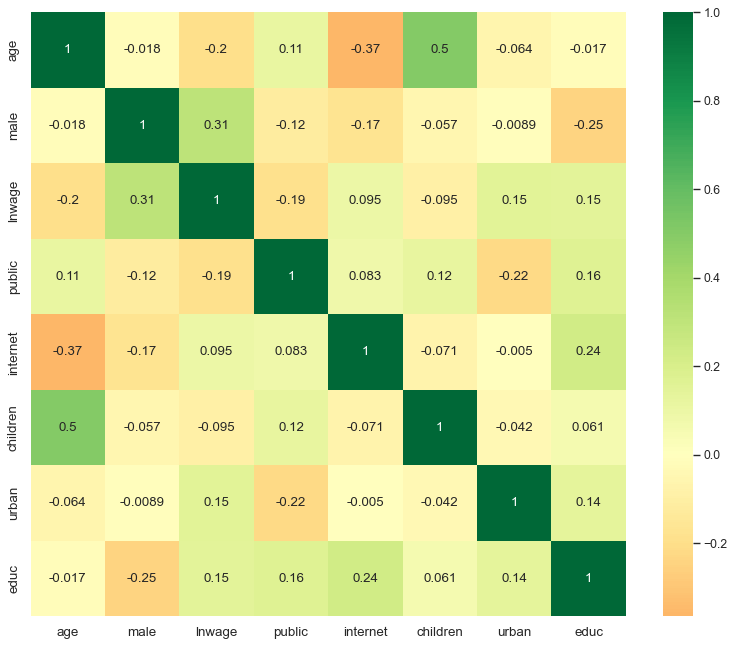

In [126]:
df1 = df.drop(columns = ['psu','industry','status', 'my_var'])

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df1.corr(), xticklabels=df1.corr().columns, yticklabels=df1.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### интерпретация

- Говоря о самых ярко выраженных данных, стоит отметить, что возраст положительно коррелирует с числом детей и отрицательно - с использованием интернета

- Переменная lnwage положительно коррелирует с переменными male и educ, что логично, исходя из ее формулы.Точно так же наблюдается отрицательная корреляция с переменной public. Полученные результаты согласуются с данными приведенного   [исследования](https://elar.urfu.ru/bitstream/10995/34328/1/urrr_2015_156.pdf)

- Можно говорить о несильно выраженной отрицательной корреляции возраста и наличия детей с переменной lnwage и положительной - для переменной urban

>бонус: мужики менее образованы, а в городах больше частного сектора





## Задание 15. 
Предположите зависимость логарифма заработной платы от каких-либо переменных в файле. Постройте графики, которые позволяют продемонстрировать эту зависимость.

/Users/psychicks/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='public', ylabel='lnwage'>

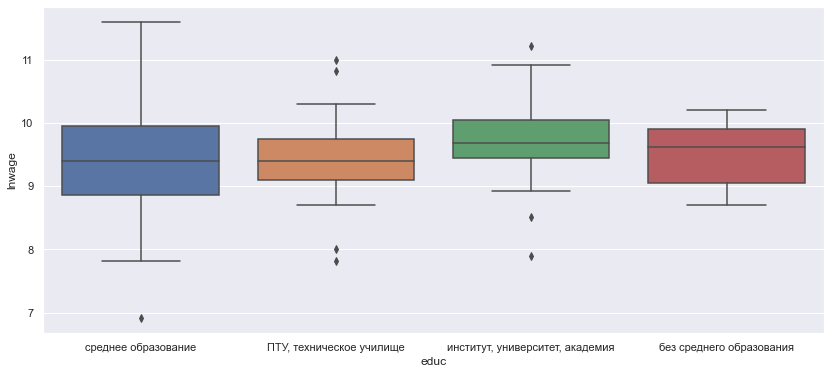

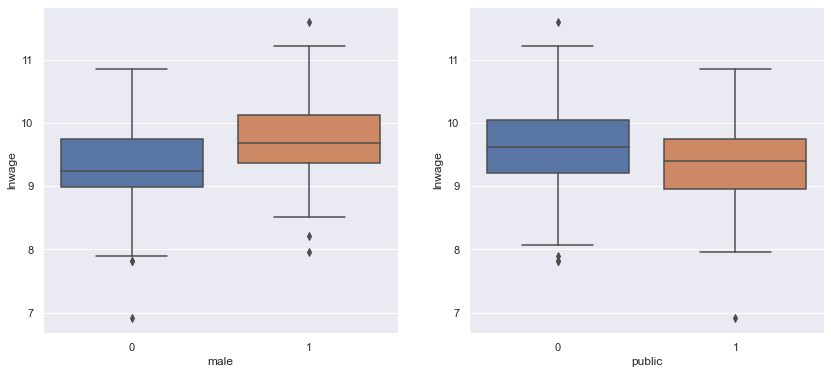

In [140]:
sns.boxplot(a,'lnwage', data=df)

fig, axes = plt.subplots(1, 2)
sns.boxplot(ax=axes[0],x = 'male', y ='lnwage', data=df)
sns.boxplot(ax=axes[1],x = 'public', y ='lnwage', data=df)